<a href="https://colab.research.google.com/github/neliphaz45/MachineLearningProjects/blob/main/Samplecode_tfidf_summary_question_answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np 
import pandas as pd


In [ ]:

# class question and answer
class QuestionAnswer:
  """
    work to do for trainees:
    write a function that cleans your faq and answer in separate two clear arrays
    write your own tfidf as covered in practical class, below we are using pre-built tf-idf
  """
  def __init__(self,  context=[], answers=[], preprocessed_data=None):
    """
      Initialize inputs, context, answers and compute questions tfidf_matrix for inline question matching
    """
    self.vectorizer = TfidfVectorizer() # initialize tf idf vectorizer
    if preprocessed_data:
      tfidf_context, context, answers = preprocessed_data # use this if you pre-saved tfidf of your context, answers
    else:
      tfidf_context = None

    self.context = context # questions or context
    self.answers = answers
    self.len_context = len(context)

    self.tfidf_matrix = tfidf_context if tfidf_context else self.get_tfidf(self.context) # could be loaded from precomputed tfidf

  def get_tfidf(self, input, test=False):
    tfidf = self.vectorizer.transform(input) if test else self.vectorizer.fit_transform(input)
    return tfidf.toarray()
    
  def get_answer_percontext(self, question, min_score=None, tfidf_vector=None, tfidf_matrix=None):
      tfidf_vector = self.get_tfidf(question, test=True)  if tfidf_vector is None else tfidf_vector # tfidf of the incoming question against precomputed context tf idf
      tfidf_matrix = self.tfidf_matrix if tfidf_matrix is None else tfidf_matrix

      # padding (this will be needed only if your tfidf_vector y axis is not equal to the one of tfidf_matrix, if you are using the same Vectorizer this  is taken care of automatically)
      diff_shape = tfidf_matrix.shape[1]-tfidf_vector.shape[1]
      if diff_shape>0: 
        tfidf_vector = np.pad(tfidf_vector,((0,0),(0,abs(diff_shape))),'constant', constant_values=(0,0))
      else:
        if diff_shape!=0:
          tfidf_matrix = np.pad(tfidf_matrix,((0,0),(0,abs(diff_shape))),'constant', constant_values=(0,0))
      
      # computre the similarity against the incoming question and context
      cos_sim = cosine_similarity(tfidf_vector, tfidf_matrix)

      # get the most likely context
      target_idx = np.argsort(cos_sim.flatten())[-1]

      # match output to answer
      if min_score is not None:
        target_idx = np.where(cos_sim>=min_score)[0]
        if len(target_idx) == 0:
          return "Not able to answer the question now"
      return self.answers[target_idx]




In [ ]:
question_answer = QuestionAnswer(context=["hello there, sup, holla", "are you doing ML class", "is it okay to present after a week"],answers=["Hello", "Yes am doing ML class" ,"yes you have been approved to present next week"] )

In [ ]:
question_answer.get_answer_percontext(["hello, sup?"])

'Hello'

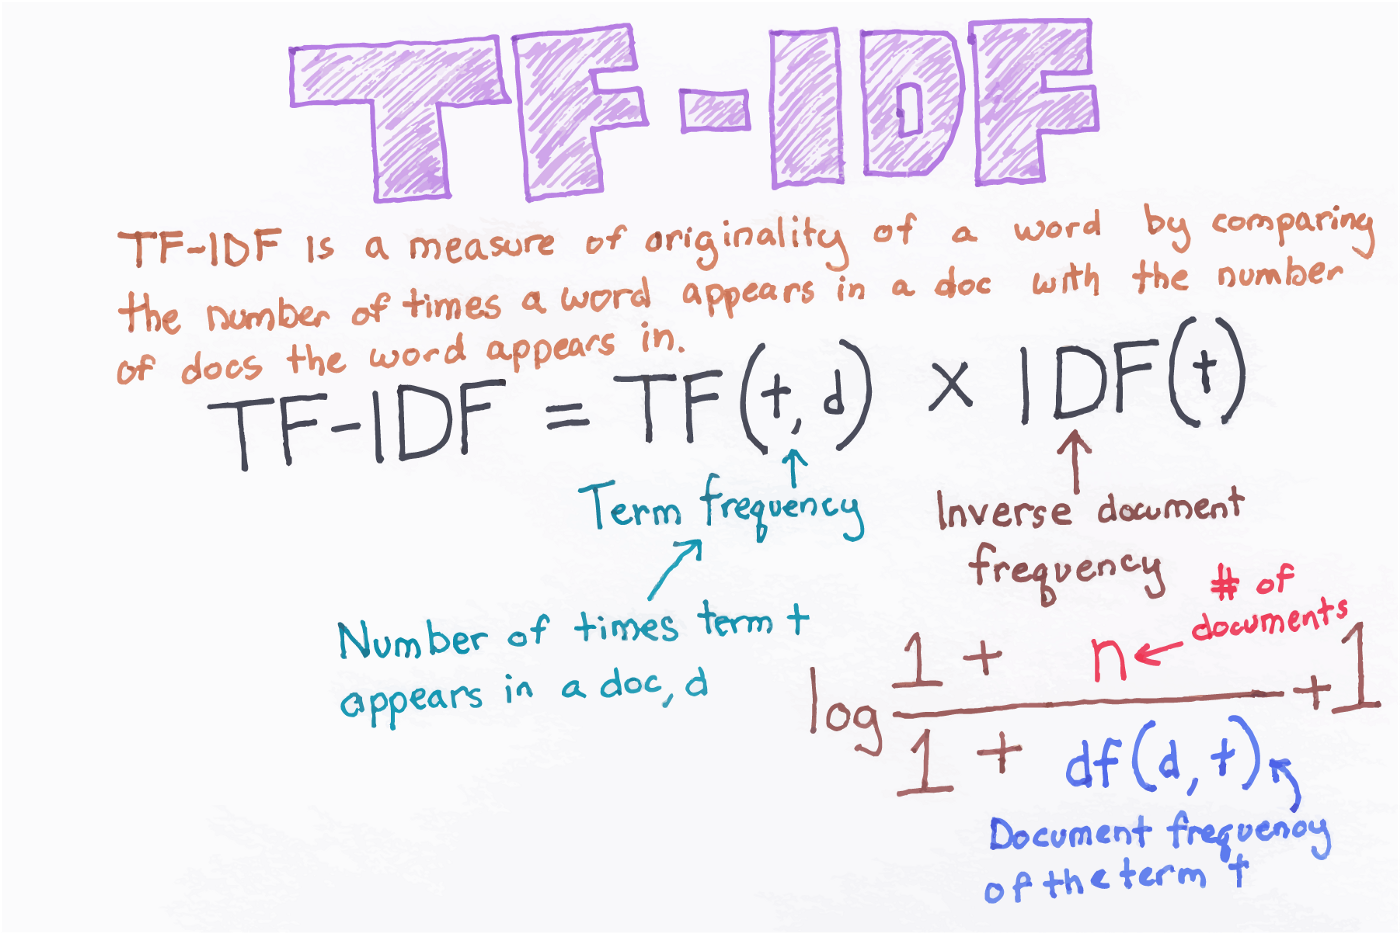